In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sts
from statistics import mean
import matplotlib.pyplot as plt
from math import sqrt, log, log2, isnan
import math

# Количество торговых дней

КОД 1

In [2]:
dataset = ['AAPL','BCO.HM','COP','EBAY','FDX','GM','HAL','HON','HPQ','IBM','INTC','KO','MA','MCD','ORCL']
SandP100 = pd.DataFrame(index = dataset)
print(SandP100)

Empty DataFrame
Columns: []
Index: [AAPL, BCO.HM, COP, EBAY, FDX, GM, HAL, HON, HPQ, IBM, INTC, KO, MA, MCD, ORCL]


In [3]:
for x in range(2012,2022):
    years=[]
    for i in range(len(dataset)):
        df = pd.read_csv('D:/curs/'+dataset[i]+'.csv', delimiter=',')
        year = (df['Date']>=str(x) + '-01-01') & (df['Date'] < str(x+1) + '-01-01')
        years.append(len(df[year]))
    SandP100[str(x)] = years
print(SandP100)

        2012  2013  2014  2015  2016  2017  2018  2019  2020  2021
AAPL     250   252   252   252   252   251   251   252   253   251
BCO.HM   248   253   253   254   255   255   252   251   254   255
COP      250   252   252   252   252   251   251   252   253   251
EBAY     250   252   252   252   252   251   251   252   253   251
FDX      250   252   252   252   252   251   251   252   253   251
GM       250   252   252   252   252   251   251   252   253   251
HAL      250   252   252   252   252   251   251   252   253   251
HON      250   252   252   252   252   251   251   252   253   251
HPQ      250   252   252   252   252   251   251   252   253   251
IBM      250   252   252   252   252   251   251   252   253   251
INTC     250   252   252   252   252   251   251   252   253   251
KO       250   252   252   252   252   251   251   252   253   251
MA       250   252   252   252   252   251   251   252   253   251
MCD      250   252   252   252   252   251   251   252   253  

# Cкачки цен

КОД 2

In [4]:
dataset = ['AAPL','COP','EBAY','FDX','GM','HAL','HON','HPQ','IBM','INTC','KO','MA','MCD','ORCL']
SandPmin = pd.DataFrame(index = dataset)
SandPmax = pd.DataFrame(index = dataset)

In [5]:
for yea in range(2012,2022):
    tiket = pd.read_csv('D:/curs/AAPL.csv', delimiter=',')
    year = (tiket['Date']>=str(yea) + '-01-01') & (tiket['Date'] < str(yea+1) + '-01-01')
    valmin = 0
    valmax = 0
    for tik in range(len(tiket['Date'])):
        if year[tik]:
            val = (tiket['Close'][tik] - tiket['Open'][tik]) / tiket['Open'][tik] * 100
            if round(val,5) > valmax:
                valmax = round(val,2)
            if round(val,5) < valmin:
                valmin = round(val,2)
    SandPmax[yea] = [valmax,0,0,0,0,0,0,0,0,0,0,0,0,0]
    SandPmin[yea] = [valmin,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [6]:
for y in range(len(dataset)):
    tiket = pd.read_csv('D:/curs/'+dataset[y]+'.csv', delimiter=',')
    for yea in range(2012,2022):
        valmin = 0
        valmax = 0
        year = (tiket['Date']>=str(yea) + '-01-01') & (tiket['Date'] < str(yea+1) + '-01-01')
        for tik in range(len(tiket['Date'])):
            if year[tik]:
                val = (tiket['Close'][tik] - tiket['Open'][tik]) / tiket['Open'][tik] * 100
                if round(val,5) > valmax:
                    valmax = round(val,2)
                if round(val,5) < valmin:
                    valmin = round(val,2)
        SandPmax[yea][dataset[y]] = valmax
        SandPmin[yea][dataset[y]] = valmin

In [7]:
print(SandPmax)

      2012  2013  2014   2015   2016  2017  2018  2019   2020  2021
AAPL  5.31  3.96  3.72   8.70   3.08  2.67  5.98  3.95   6.26  3.32
COP   2.78  1.93  4.37   7.59   7.76  3.99  6.62  4.43  16.22  5.13
EBAY  4.96  4.19  4.43   6.25   4.01  3.60  5.69  4.34   6.58  7.84
FDX   4.59  4.56  2.61   2.64   4.34  3.29  3.99  3.62  12.98  3.30
GM    7.43  5.32  3.70   5.07   5.82  4.19  5.61  3.93   9.27  5.82
HAL   5.23  6.39  4.64   6.61  11.09  3.89  4.43  8.04  11.99  6.47
HON   3.32  2.70  3.18   3.40   2.77  1.98  3.64  2.39   8.65  3.62
HPQ   4.63  8.81  7.09  10.91   5.35  6.60  5.54  3.50  15.52  5.46
IBM   2.23  2.67  3.33   3.03   2.87  2.65  4.21  5.00   6.00  3.98
INTC  4.01  3.03  5.30   6.63   2.68  2.67  4.98  4.19  12.78  5.79
KO    2.02  2.34  2.74   2.10   2.46  2.67  2.86  2.30   7.15  2.25
MA    3.92  4.47  6.10   3.15   9.31  1.89  5.93  3.36   9.80  4.09
MCD   2.98  2.06  3.06   3.95   2.58  2.58  4.31  1.86  10.58  3.19
ORCL  3.09  3.04  4.10   3.30   2.65  8.57  4.37

In [8]:
print(SandPmin)

       2012  2013  2014  2015  2016  2017  2018  2019   2020  2021
AAPL  -5.29 -4.16 -4.03 -6.63 -2.97 -4.00 -4.04 -3.24  -7.26 -3.92
COP   -2.89 -2.70 -3.03 -6.29 -8.40 -3.16 -5.75 -4.19  -8.44 -5.37
EBAY  -3.77 -3.98 -3.00 -4.02 -4.67 -3.61 -5.14 -4.19  -6.51 -5.34
FDX   -3.72 -3.03 -3.29 -5.04 -3.71 -3.53 -6.20 -4.03  -7.17 -3.33
GM    -4.13 -3.44 -4.92 -6.58 -4.21 -3.89 -4.55 -3.92 -10.78 -4.74
HAL   -4.65 -3.90 -6.99 -5.16 -4.57 -5.64 -5.09 -5.61 -17.53 -6.12
HON   -2.93 -2.26 -2.72 -4.49 -2.66 -2.68 -3.79 -3.41  -6.94 -3.03
HPQ  -13.46 -4.22 -4.11 -5.48 -4.97 -6.13 -6.35 -9.57  -8.68 -4.72
IBM   -2.85 -2.93 -3.04 -4.07 -3.85 -2.36 -4.22 -3.04  -6.36 -4.69
INTC  -2.92 -2.81 -2.98 -4.33 -3.16 -2.85 -5.59 -3.60  -6.15 -6.82
KO    -1.81 -2.83 -2.16 -2.91 -2.67 -1.83 -3.77 -2.38  -8.70 -2.79
MA    -3.68 -2.75 -4.27 -4.41 -4.91 -4.33 -6.04 -4.96 -10.42 -6.24
MCD   -2.69 -1.74 -2.75 -4.46 -4.35 -2.42 -4.06 -2.84  -5.98 -2.54
ORCL  -4.73 -2.71 -3.37 -4.11 -3.52 -3.77 -4.68 -2.79  -6.11 -

# График акций

КОД 3

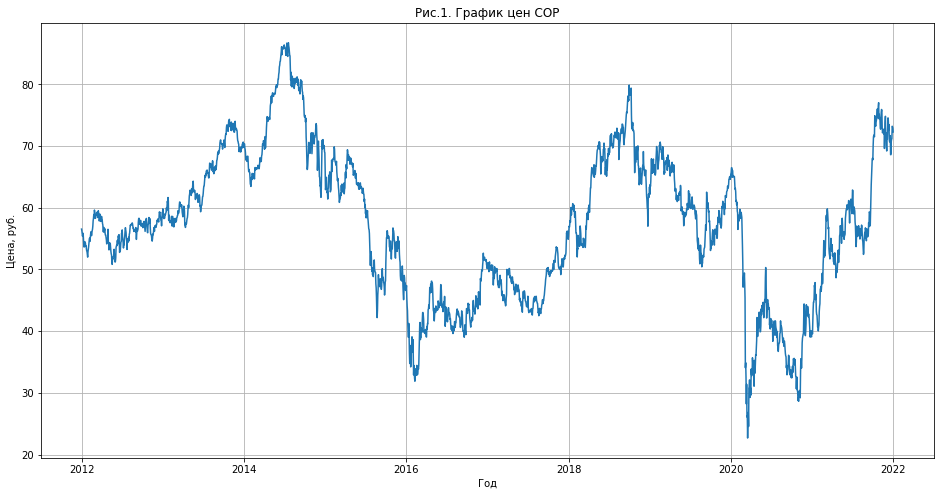

In [10]:
df = pd.read_csv('D:/curs/COP.csv', delimiter=',')
graph_cop = pd.DataFrame()
graph_cop['date'] = df['Date']
graph_cop['close'] = df['Close']
year = (df['Date']>='2012-01-01') & (df['Date'] < '2022-01-01')
y = graph_cop['close']
x = np.linspace(2012, 2022, len(y))
fig, ax = plt.subplots(figsize=(16,8))
plt.grid(True) # линия сетки
plt.plot(x,y)
plt.ylabel('Цена, руб.')
plt.xlabel('Год')
plt.title('Рис.1. График цен COP')
plt.show()

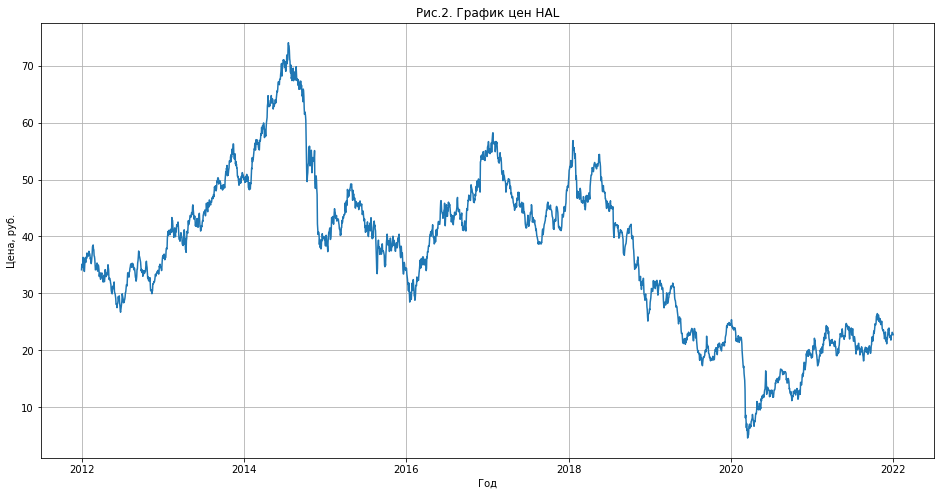

In [11]:
df = pd.read_csv('D:/curs/HAL.csv', delimiter=',')
graph_hal = pd.DataFrame()
graph_hal['date'] = df['Date']
graph_hal['close'] = df['Close']
year = (df['Date']>='2012-01-01') & (df['Date'] < '2022-01-01')
y = graph_hal['close']
x = np.linspace(2012, 2022, len(y))
fig, ax = plt.subplots(figsize=(16,8))
plt.grid(True) # линия сетки
plt.plot(x,y)
plt.ylabel('Цена, руб.')
plt.xlabel('Год')
plt.title('Рис.2. График цен HAL')
plt.show()

# проверка гипотез на модельных данных

Квантили

КОД 4

In [12]:
# функция,возвращающая мат. ожидаение, дисперсия, массив элементов в интервалах и список центральных точек отрезков разбиения
def ozenka(massive):
    # упорядочивает сгенерированную выборку
    massive = sorted(massive)
    n = len(massive)
    k = int(math.log2(n)) + 1 # по формуле Стерджесса расчитывает количество интервалов разбиения выборки
    step = (max(massive)-min(massive))/k #шаг разбиения 
    centre = [min(massive)] # список который будет собирать центральные точки отрезков разбиения (первая точка в разбиении - минимум выборки)
    razb_otrez = [] # список, который будет собирать разбитые на отрезки данные 
    razb_otrez.append([x for x in massive if x < centre[-1]+step/2])
    for i in range(2, k):
        centre.append(centre[0]+(i-1)*step)
        razb_otrez.append([x for x in massive if centre[-1]-0.5*step < x < centre[-1]+0.5*step])
    centre.append(centre[0]+(k-1)*step)
    razb_otrez.append([x for x in massive if x > centre[-1]-0.5*step])
    
    math_wa = sum(massive)/n # мат ожидание
    summa = 0
    for i in range(n):
        summa += (massive[i] - math_wa)**2
    dispar = summa/n #дисперсия

    # список частот (количество элементов в интервалах)
    kolvo = [len(x) for x in razb_otrez]
    
 
 # возвращаем мат. ожидание, дисперсию, массив элементов в интервалах, список центральных точек отрезков разбиений
    return math_wa, dispar, kolvo, centre

In [13]:
def Pirson(n):
    # генерируем нормальную выборку
    viborka = sts.norm(0, 1).rvs(n)
    m = int(math.log2(n)) + 1 # по формуле Стерджесса расчитывает количество интервалов разбиения выборки
    step = max(viborka)-min(viborka)
    step = step/m # шаг разбиения 
    asdfgh = ozenka(viborka) # получение нужных данных при помощи функции ozenka
    M = asdfgh[0]
    Disp = asdfgh[1]
    kolvo = asdfgh[2]
    centre = asdfgh[3]# считывание необходимых данных для критерия Пирсона
    Exp = sts.norm(M, math.sqrt(Disp)) # ожидаемое распределение (то, с которой будем сравнивать рандомную выборку)
    
    # составляем список вероятностей попадания в интервалы, на которые разбиваем интервалы
    Prob = [Exp.cdf(centre[0]+0.5*step)]
    for i in range(1, len(centre)-1): # функция cdf вычисляет вероятность попадания случайной величины в исселдуемый промежуток
        Prob.append(Exp.cdf(centre[i]+0.5*step) - Exp.cdf(centre[i]-0.5*step))
    Prob.append(1-Exp.cdf(centre[-1]-0.5*step))

    # высчитываем статистику критерия Пирсона
    chi = []
    for i in range(len(Prob)):
        chi.append(((kolvo[i]-n*Prob[i])**2)/(n*Prob[i])) # формула
    Xi_square = sum(chi)
    
    # вычисляем p-значение
    p_value = (sts.chi2(len(kolvo)-3).sf(Xi_square)) # функция chi2. вычитаем 3 из-за количества степеней свободы
    # возвращаем статистику критерия Пирсона и p-value
    return Xi_square, p_value

In [16]:
N = 10000 
# создаём пустые таблицы для 9 и 999 квантилей 
df_9 = pd.DataFrame(index = [i for i in range(1,10)])
df_999 = pd.DataFrame(index = [i for i in range(1,1000)])
# создаём списки значений статистики и p-value
xi = []
p_value = []
# вычисляем 10000 значений статистики по критерию пирсона
for statist in range(N):
    current_pirs = Pirson(252)
 
    xi.append(current_pirs[0])
    p_value.append(current_pirs[1])
    

# подсчет 9 и 999 квантилей
xi2_q9 = np.quantile(xi, np.arange(0.1, 1, 0.1))
xi2_q999 = np.quantile(xi, np.arange(0.001, 1, 0.001))
 
# запись в таблицы квантилей и их значений
df_9['quantile'] = [round(i, 3) for i in list(np.arange(0.1, 1, 0.1))]
df_999['quantile'] = [round(i, 3) for i in list(np.arange(0.001, 1, 0.001))]
df_9['value'] = np.round(xi2_q9, 4)
df_999['value'] = np.round(xi2_q999, 4)


# сохранение таблиц в csv файлы

In [17]:
print(df_9)

   quantile    value
1       0.1   1.8155
2       0.2   2.5795
3       0.3   3.2685
4       0.4   3.9765
5       0.5   4.7254
6       0.6   5.5218
7       0.7   6.5644
8       0.8   8.0751
9       0.9  10.3968


In [18]:
print(df_999)

     quantile    value
1       0.001   0.3288
2       0.002   0.3806
3       0.003   0.4512
4       0.004   0.5015
5       0.005   0.5395
..        ...      ...
995     0.995  30.0160
996     0.996  33.0287
997     0.997  42.0689
998     0.998  59.0453
999     0.999  85.4044

[999 rows x 2 columns]


Гистограммы

КОД 5

P-value = 0.266


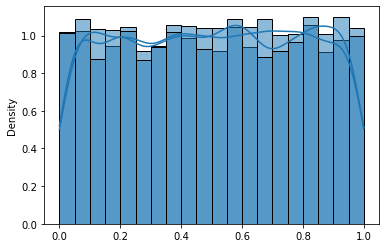

In [19]:
n = 252
N = 10000
xi2 = []
chi_square = []
for p in range(10000):
    chi_square.append(Pirson(n)[0])
chi_square_q999 = np.quantile(chi_square, np.arange(0.001, 1, 0.001))
p_value_pirs_list = [] # список p-значений критерия Пирсона вычисленных вручную
for pp in range(10000):
    lenn = 0
    xx = Pirson(n)[0]
    for p in range(len(chi_square_q999)):
        if chi_square_q999[p] > xx:
            lenn += 1 
    p_value_pirs_list.append(lenn/len(chi_square_q999))
    

p_value_ks_list = [] #cоздаем cписок p-значений критерия Колмогорова - Смирнова
n = 250
for p in range(10000):
    list_norm = sts.norm(0, 1).rvs(n)
    p_value_ks_list.append(sts.kstest(list_norm,'norm')[1])
    
sns.histplot(p_value_ks_list, bins = 20, stat = 'density', kde = True)

sns.histplot(p_value_pirs_list, bins = 20, stat = 'density', kde = True)

# cделаем проверку, что распределения p-значений близки друг к другу и выведем P-value двух выборок
p_value = sts.ks_2samp(p_value_ks_list,p_value_pirs_list)
print("P-value =",round(p_value[1],3))

<AxesSubplot:ylabel='Density'>

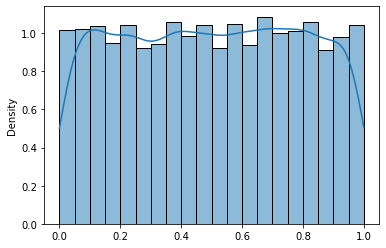

In [20]:
sns.histplot(p_value_ks_list, bins = 20, stat = 'density', kde = True)

<AxesSubplot:ylabel='Density'>

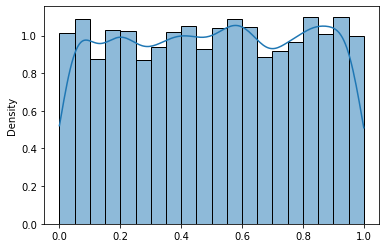

In [21]:
sns.histplot(p_value_pirs_list, bins = 20, stat = 'density', kde = True)

# Альтернативная гипотеза

таблица мощности критерия

КОД 6

In [22]:
N = 1000
n = 252
df = pd.DataFrame()
p_value_pirs = [] #список р-значений критерия пирсона
for i in range(1000):
    massive = sts.t(3).rvs(n) # сгенерируем выборку распределения Стьюдента с 3 степенями свободы
    k = 1 + int(math.log2(n)) 
    step = max(massive)-min(massive)
    step = step / k
    asdfgh = ozenka(massive)
    M = asdfgh[0]
    Disp = asdfgh[1]
    kolvo = asdfgh[2]
    centre = asdfgh[3]
    Exp = sts.norm(M, math.sqrt(Disp))
    Prob = [Exp.cdf(centre[0]+0.5*step)]
    for i in range(1, len(centre)-1): # функция cdf вычисляет вероятность попадания случайной величины в исселдуемый промежуток
        Prob.append(Exp.cdf(centre[i]+0.5*step) - Exp.cdf(centre[i]-0.5*step))
    Prob.append(1-Exp.cdf(centre[-1]-0.5*step))
    T = []
    for i in range(len(Prob)):
        if Prob[i] == 0:
            continue
        T.append(((kolvo[i]-n*Prob[i])**2)/(n*Prob[i]))
    xi_2 = sum(T)
    p_value_pirs.append(sts.chi2(len(kolvo)-3).sf(xi_2))
# отбираем p-value меньше 0.05 
PV = [v for v in p_value_pirs if v < 0.05 or math.isnan(v)]
# запись мощности критерия в таблицу
df['3'] = [len(PV)/1000]

In [23]:
p_value = [] #список p-value критерия Пирсона
for i in range(N):
    # генерируем выборку нужного объема распределения Стьюдента
    massive = sts.t(30).rvs(n)
    # данный кусок кода поясняется выше 
    k = 1+int(math.log2(n)) 
    step = (max(massive)-min(massive))/k
    func = ozenka(massive)
    M, Disp, centre, kolvo = func[0], func[1], func[3], func[2]
    Exp = sts.norm(M, math.sqrt(Disp))
    Prob = [Exp.cdf(centre[0]+0.5*step)]
    for i in range(1, len(centre)-1): # функция cdf вычисляет вероятность попадания случайной величины в исселдуемый промежуток
        Prob.append(Exp.cdf(centre[i]+0.5*step) - Exp.cdf(centre[i]-0.5*step))
    Prob.append(1-Exp.cdf(centre[-1]-0.5*step))
    T = []
    for i in range(len(Prob)):
        if Prob[i] == 0:
            continue
        T.append(((kolvo[i]-n*Prob[i])**2)/(n*Prob[i]))
    xi_2 = sum(T)
    p_value.append(sts.chi2(len(kolvo)-3).sf(xi_2))
# отбираем p-value меньше 0.05 
PV = [v for v in p_value if v < 0.05 or math.isnan(v)]
# запись мощности критерия в таблицу
df['30'] = [len(PV)/N]

In [24]:
p_value = [] #список p-value критерия Пирсона
for i in range(N):
    # генерируем выборку нужного объема распределения Стьюдента
    massive = sts.t(300).rvs(n)
    # данный кусок кода поясняется выше 
    k = 1+int(math.log2(n)) 
    step = (max(massive)-min(massive))/k
    func = ozenka(massive)
    M, Disp, centre, kolvo = func[0], func[1], func[3], func[2]
    Exp = sts.norm(M, math.sqrt(Disp))
    Prob = [Exp.cdf(centre[0]+0.5*step)]
    for i in range(1, len(centre)-1): # функция cdf вычисляет вероятность попадания случайной величины в исселдуемый промежуток
        Prob.append(Exp.cdf(centre[i]+0.5*step) - Exp.cdf(centre[i]-0.5*step))
    Prob.append(1-Exp.cdf(centre[-1]-0.5*step))
    T = []
    for i in range(len(Prob)):
        if Prob[i] == 0:
            continue
        T.append(((kolvo[i]-n*Prob[i])**2)/(n*Prob[i]))
    xi_2 = sum(T)
    p_value.append(sts.chi2(len(kolvo)-3).sf(xi_2))
# отбираем p-value меньше 0.05 
PV = [v for v in p_value if v < 0.05 or math.isnan(v)]
# запись мощности критерия в таблицу
df['300'] = [len(PV)/N]

In [25]:
print(df)

       3     30    300
0  0.986  0.146  0.091


Графики

КОД 7

In [26]:
n = 252
N = 10000
df = pd.DataFrame()
for lenn in (3,30,300):
    p_value = []
    for j in range(N):
        massive = sts.t(lenn).rvs(n) # генерируем выборку распределения Стьюдента нужного объёма
        k = int(math.log2(n)) + 1 # формула Стерджесса
        step = (max(massive)-min(massive))/k
        function = ozenka(massive)
        M, Disp, centre, kolvo = function[0], function[1], function[3], function[2]
        Exp = sts.norm(M, math.sqrt(Disp))
        Prob = [Exp.cdf(centre[0]+0.5*step)]
        for i in range(1, len(centre)-1): # функция cdf вычисляет вероятность попадания случайной величины в исселдуемый промежуток
            Prob.append(Exp.cdf(centre[i]+0.5*step) - Exp.cdf(centre[i]-0.5*step))
        Prob.append(1-Exp.cdf(centre[-1]-0.5*step))
        T = []
        for u in range(len(Prob)):
            if Prob[u] == 0:
                continue
            T.append(((kolvo[u]-n*Prob[u])**2)/(n*Prob[u]))
        xi2 = sum(T)
        p_value.append(sts.chi2(len(kolvo)-3).sf(xi2))
    lenn = str(lenn)
    df[lenn] = p_value

<AxesSubplot:xlabel='3', ylabel='Density'>

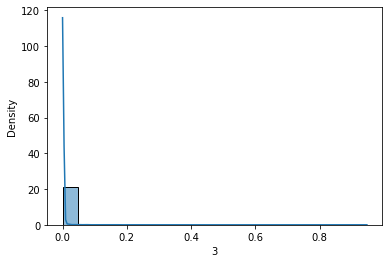

In [27]:
sns.histplot(df['3'], bins = 20, stat = 'density', kde = True)

<AxesSubplot:xlabel='30', ylabel='Density'>

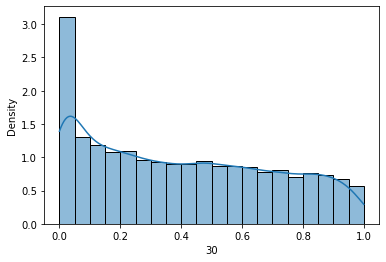

In [28]:
sns.histplot(df['30'], bins = 20, stat = 'density', kde = True)

<AxesSubplot:xlabel='300', ylabel='Density'>

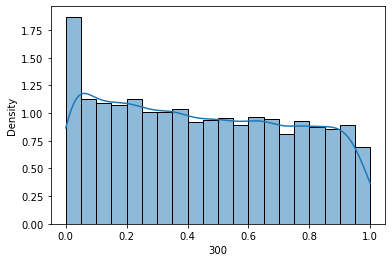

In [29]:
sns.histplot(df['300'], bins = 20, stat = 'density', kde = True)

# Реальные данные

ТЕСТЫ

In [30]:
dataset = ['AAPL','COP','EBAY','FDX','GM','HAL','HON','HPQ','IBM','INTC','KO','MA','MCD','ORCL']
SandP100 = pd.DataFrame(index = dataset)
for x in range(2012,2022):
    years=[]
    for i in range(len(dataset)):
        df = pd.read_csv('D:/curs/'+dataset[i]+'.csv', delimiter=',')
        year = (df['Date']>=str(x) + '-01-01') & (df['Date'] < str(x+1) + '-01-01')
        years.append(len(df[year]))
    SandP100[str(x)] = years
print(SandP100)

      2012  2013  2014  2015  2016  2017  2018  2019  2020  2021
AAPL   250   252   252   252   252   251   251   252   253   251
COP    250   252   252   252   252   251   251   252   253   251
EBAY   250   252   252   252   252   251   251   252   253   251
FDX    250   252   252   252   252   251   251   252   253   251
GM     250   252   252   252   252   251   251   252   253   251
HAL    250   252   252   252   252   251   251   252   253   251
HON    250   252   252   252   252   251   251   252   253   251
HPQ    250   252   252   252   252   251   251   252   253   251
IBM    250   252   252   252   252   251   251   252   253   251
INTC   250   252   252   252   252   251   251   252   253   251
KO     250   252   252   252   252   251   251   252   253   251
MA     250   252   252   252   252   251   251   252   253   251
MCD    250   252   252   252   252   251   251   252   253   251
ORCL   250   252   252   252   252   251   251   252   253   251


In [36]:
SandPlog = pd.DataFrame(index = dataset)
for i in range(2012,2022):
    df = pd.read_csv('D:/curs/AAPL.csv', delimiter=',')
    year = (df['Date']>=str(i) + '-01-01') & (df['Date'] < str(i+1) + '-01-01')
    val = 0
    for y in range(len(df['Date'])):
        if year[y]:
            val += log(df['Close'][y]/df['Open'][y])
    SandPlog[i] = [val,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [37]:
for y in range(len(dataset)):
    df = pd.read_csv('D:/curs/'+dataset[y]+'.csv', delimiter=',')
    for x in range(2012,2022):
        val = 0
        year = (df['Date']>=str(x) + '-01-01') & (df['Date'] < str(x+1) + '-01-01')
        for i in range(len(df['Date'])):
            if year[i]:
                val += log(df['Close'][i]/df['Open'][i])
                
        SandPlog[x][y] = round(val,3)

In [38]:
# датафрейм логарифмической доходности за каждый год
print(SandPlog)

       2012   2013   2014   2015   2016   2017   2018   2019   2020   2021
AAPL -0.233 -0.259  0.127 -0.285  0.223  0.203 -0.091  0.457  0.338  0.202
COP  -0.027  0.103 -0.103 -0.136  0.111 -0.082 -0.023 -0.107 -0.461  0.211
EBAY  0.206 -0.080 -0.048  0.227  0.295  0.123 -0.319  0.042  0.409  0.218
FDX   0.154  0.431  0.019 -0.090  0.209  0.081 -0.399  0.205 -0.014 -0.255
GM    0.255 -0.025 -0.196 -0.211 -0.042 -0.007 -0.507 -0.018 -0.399 -0.057
HAL  -0.106  0.224 -0.435  0.101  0.640 -0.274 -0.503 -0.104 -0.656 -0.092
HON   0.141  0.236 -0.069 -0.031  0.221  0.035 -0.256  0.059  0.176 -0.118
HPQ  -0.185  0.518  0.225 -0.017  0.508  0.226 -0.158  0.219  0.185  0.266
IBM   0.074  0.099  0.053 -0.054  0.307 -0.144 -0.280  0.091 -0.042  0.098
INTC -0.030  0.176  0.357  0.257  0.205  0.127 -0.089  0.278  0.129 -0.147
KO   -0.044 -0.018  0.266  0.034  0.091  0.150 -0.023  0.037 -0.295 -0.061
MA    0.173  0.198 -0.183 -0.033  0.153  0.129 -0.005  0.206 -0.105 -0.279
MCD  -0.193  0.116  0.069

таблица p-значений для реальных данных

КОД 8

In [39]:
dataset = ['AAPL','COP','EBAY','FDX','GM','HAL','HON','HPQ','IBM','INTC','KO','MA','MCD','ORCL']
SandPpirs = pd.DataFrame(index = dataset)
for i in range(2012,2022):
    SandPpirs[str(i)] = [1,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(2012,2022):
    SandPpirs[str(i)] = SandPpirs[str(i)].astype(float)

In [40]:
p_value_for_hist = []
for y in range(len(dataset)):
    values = []
    df = pd.read_csv('D:/curs/'+dataset[y]+'.csv', delimiter=',')
    for x in range(2012,2022):
        viborka = []
        year = (df['Date']>=str(x) + '-01-01') & (df['Date'] < str(x+1) + '-01-01')
        for i in range(len(df['Date'])):
            if year[i]:
                viborka.append(np.log(df['Close'][i]/df['Open'][i]))
                
        #подсчет n
        year = (df['Date']>=str(x) + '-01-01') & (df['Date'] < str(x+1) + '-01-01')
        n = len(df[year])
        k = 1 + int(math.log2(n)) 
        step = max(viborka)-min(viborka)
        step = step / k
        asdfgh = ozenka(viborka)
        M = asdfgh[0]
        Disp = asdfgh[1]
        kolvo = asdfgh[2]
        centre = asdfgh[3]
        Exp = sts.norm(M, math.sqrt(Disp))
        Prob = [Exp.cdf(centre[0]+0.5*step)]
        for i in range(1, len(centre)-1): # функция cdf вычисляет вероятность попадания случайной величины в исселдуемый промежуток
            Prob.append(Exp.cdf(centre[i]+0.5*step) - Exp.cdf(centre[i]-0.5*step))
        Prob.append(1-Exp.cdf(centre[-1]-0.5*step))
    
        T = []
        for i in range(len(Prob)):
            if Prob[i] == 0:
                continue
            T.append(((kolvo[i]-n*Prob[i])**2)/(n*Prob[i]))
        xi_2 = sum(T)
        p_value = (sts.chi2(len(kolvo)-3).sf(xi_2))
        
        p_value_for_hist.append(p_value) # для гистограммы массив из p-значений
        
        SandPpirs[str(x)][dataset[y]] = round(p_value,3)
print(SandPpirs)

       2012   2013   2014   2015   2016   2017   2018   2019   2020   2021
AAPL  0.000  0.832  0.002  0.000  0.000  0.000  0.001  0.276  0.011  0.016
COP   0.580  0.002  0.013  0.004  0.000  0.985  0.000  0.029  0.000  0.047
EBAY  0.625  0.063  0.180  0.001  0.009  0.047  0.239  0.001  0.001  0.004
FDX   0.276  0.009  0.015  0.000  0.000  0.000  0.000  0.413  0.000  0.067
GM    0.016  0.073  0.010  0.000  0.001  0.003  0.060  0.009  0.000  0.064
HAL   0.192  0.038  0.000  0.434  0.000  0.000  0.005  0.323  0.000  0.525
HON   0.029  0.661  0.051  0.000  0.003  0.000  0.000  0.000  0.000  0.297
HPQ   0.000  0.000  0.000  0.000  0.005  0.000  0.000  0.000  0.000  0.052
IBM   0.001  0.003  0.024  0.000  0.000  0.222  0.002  0.000  0.000  0.000
INTC  0.982  0.394  0.000  0.000  0.006  0.000  0.098  0.484  0.000  0.000
KO    0.281  0.025  0.083  0.010  0.000  0.000  0.000  0.727  0.000  0.005
MA    0.409  0.292  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
MCD   0.014  0.229  0.000

гистограмма p-значений для реальных данных

<AxesSubplot:ylabel='Count'>

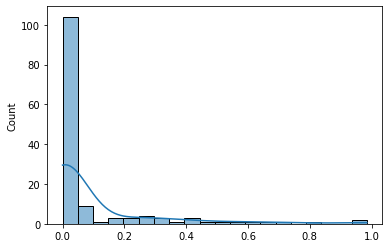

In [41]:
sns.histplot(p_value_for_hist, bins = 20, stat = 'count', kde = True)

таблица для 1 процента 5 процентов и 10 процентов p-уровня значимости

КОД 9

In [42]:
p_val_1 = 0
p_val_5 = 0
p_val_10 = 0
p_val = pd.DataFrame(columns = ['1%','5%','10%'])
for i in range(2012,2022):
    for j in range(len(dataset)):
        if SandPpirs[str(i)][dataset[j]] > 0.01:
            p_val_1 += 1
        if SandPpirs[str(i)][dataset[j]] > 0.05:
            p_val_5 += 1
        if SandPpirs[str(i)][dataset[j]] > 0.1:
            p_val_10 += 1


percents = [round(p_val_1/len(dataset)/(2022-2012),3),round(p_val_5/len(dataset)/(10),3),round(p_val_10/len(dataset)/10,3)]
p_val.loc[0] = percents
print(p_val)

      1%     5%    10%
0  0.364  0.257  0.193


In [46]:
print(sts.kstest(p_value_for_hist,'norm'))

KstestResult(statistic=0.5, pvalue=6.869300438276986e-33)


нахождение p_значений для всех компаний с учетом rsi (среднее скользящее)

ТЕСТ

In [47]:
dataset = ['AAPL','COP','EBAY','FDX','GM','HAL','HON','HPQ','IBM','INTC','KO','MA','MCD','ORCL']
SandP_RSI_all_sma = pd.DataFrame(index = dataset)

In [48]:
for x in range(len(dataset)):
    df = pd.read_csv('D:/curs/'+dataset[x]+'.csv', delimiter=',')
    
    rsi_below_30 = []
    rsi_between_30_70 = []
    rsi_higher_70 = []
    for i in range(15,len(df['Date'])):
        mas_rsi = []
        mas_rsi_up = []
        mas_rsi_down = []
        for j in range(i-15, i):
            mas_rsi.append(df['Close'][j])
        #заполняем массив для средних
        for j in range(1,len(mas_rsi)):
            if mas_rsi[j] > mas_rsi[j-1]:
                mas_rsi_up.append(mas_rsi[j])
            if mas_rsi[j] < mas_rsi[j-1]:
                mas_rsi_down.append(mas_rsi[j])
                
        #проверим, что в массивах хотябы 1 элемент
        if len(mas_rsi_down) == 0:
            mas_rsi_down.append(df['Close'][i-14])
        if len(mas_rsi_up) == 0:
            mas_rsi_up.append(df['Close'][i-14])
                
        #посчитаем значения для формулы
        rsi_up = mean(mas_rsi_up)
        rsi_down = mean(mas_rsi_down)
        rs = rsi_up/rsi_down
    
        #формула
        rsi = 100-(100/(1+rs))
    
        #добавление в массив логорифмической доходности
        if rsi < 45:
            rsi_below_30.append(np.log(df['Close'][i]/df['Open'][i]))
        if rsi < 70 and rsi > 30:
            rsi_between_30_70.append(np.log(df['Close'][i]/df['Open'][i]))
        if rsi > 55:
            rsi_higher_70.append(np.log(df['Close'][i]/df['Open'][i]))
            
    #массив для трех случаев
    rsi_massive = [rsi_below_30, rsi_between_30_70, rsi_higher_70]
    p_value_massive = []

    #посчитаем p-значение для каждой выборки
    for u in range(3):

        n = len(rsi_massive[u])
        if n == 0:
            p_value_massive.append(None)
            continue
            
        k = int(math.log2(n)) + 1 # по формуле Стерджесса расчитывает количество интервалов разбиения выборки
        step = (max(rsi_massive[u])-min(rsi_massive[u]))/k # шаг разбиения 
        func = ozenka(rsi_massive[u]) # получение нужный данных при помощи функции ozenka
        M, Disp, centre, kolvo = func[0], func[1], func[3], func[2] # считывание необходимых данных для критерия Пирсона
        Exp = sts.norm(M, math.sqrt(Disp))
        Prob = [Exp.cdf(centre[0]+0.5*step)]
        for i in range(1, len(centre)-1): # функция cdf вычисляет вероятность попадания случайной величины в исселдуемый промежуток
            Prob.append(Exp.cdf(centre[i]+0.5*step) - Exp.cdf(centre[i]-0.5*step))
        Prob.append(1-Exp.cdf(centre[-1]-0.5*step))
    
        T = []
        for i in range(len(Prob)):
            if Prob[i] == 0:
                continue
            T.append(((kolvo[i]-n*Prob[i])**2)/(n*Prob[i]))
        xi_2 = sum(T)
        p_value = (sts.chi2(len(kolvo)-3).sf(xi_2))
        #p_value = round(p_value,3)
        p_value_massive.append(p_value)
    print(p_value_massive)

[None, 0.0, None]
[None, 0.0, None]
[None, 5.591448944600687e-81, None]
[None, 0.0, None]
[None, 0.0, None]
[nan, 0.0, None]
[None, 0.0, None]
[None, 0.0, None]
[None, 0.0, None]
[None, 0.0, None]
[None, 0.0, None]
[None, 0.0, None]
[None, 0.0, None]
[None, 0.0, None]


нахождение p_значений для всех компаний с учетом rsi (Экспоненциальная среднее скользящее)

КОД 10

In [49]:
dataset = ['AAPL','COP','EBAY','FDX','GM','HAL','HON','HPQ','IBM','INTC','KO','MA','MCD','ORCL']
SandP_RSI_all_ema = pd.DataFrame(index = dataset)
# массив изначальных EMA взятых с сайта TradingView
EMA = [14.3, 54.6, 12.8, 83.3, 20.3, 33.8, 51.3, 11.8, 177.2, 24.3, 34.5, 36.9, 98.9, 27]

In [52]:
for x in range(len(dataset)):
    df = pd.read_csv('D:/curs/'+dataset[x]+'.csv', delimiter=',')
    
    rsi_below_30 = []
    rsi_between_30_70 = []
    rsi_higher_70 = []
    for i in range(15,len(df['Date'])):
        mas_rsi = []
        mas_rsi_up = []
        mas_rsi_down = []
        for j in range(i-15, i):
            mas_rsi.append(df['Close'][j])
        #заполняем массив для средних
        for j in range(1,len(mas_rsi)):
            if mas_rsi[j] > mas_rsi[j-1]:
                mas_rsi_up.append(mas_rsi[j])
            if mas_rsi[j] < mas_rsi[j-1]:
                mas_rsi_down.append(mas_rsi[j])
                
        #проверим, что в массивах хотябы 1 элемент
        if len(mas_rsi_down) == 0:
            mas_rsi_down.append(df['Close'][i-14])
        if len(mas_rsi_up) == 0:
            mas_rsi_up.append(df['Close'][i-14])
                
        #посчитаем значения для формулы
        ema_first_up = EMA[x]
        ema_first_down = EMA[x]
        
        alpha_up = 2/(1+len(mas_rsi_up)) #сглаживающий фактор
        alpha_down = 2/(1+len(mas_rsi_down)) #сглаживающий фактор
        
        ema_up = (df['Close'][i] * alpha_up) + (ema_first_up * (1-alpha_up))
        ema_down = (df['Close'][i] * alpha_down) + (ema_first_down * (1-alpha_down))
        
        rs = ema_up/ema_down
        
        ema_first_up = ema_up
        ema_first_down = ema_down
    
        #формула
        rsi = 100-(100/(1+rs))
    
        #добавление в массив цен закрытий
        if rsi < 40:
            rsi_below_30.append(np.log(df['Close'][i]/df['Open'][i]))
        if rsi < 70 and rsi > 30:
            rsi_between_30_70.append(np.log(df['Close'][i]/df['Open'][i]))
        if rsi > 60:
            rsi_higher_70.append(np.log(df['Close'][i]/df['Open'][i]))
            
    #массив для трех случаев
    rsi_massive = [rsi_below_30, rsi_between_30_70, rsi_higher_70]
    p_value_massive = []
    p_val_kolm = []

    #посчитаем p-значение для каждой выборки
    for u in range(3):

        n = len(rsi_massive[u])
        if n == 0:
            p_value_massive.append(None)
            p_val_kolm.append(None)
            continue
        
            
        k = int(math.log2(n)) + 1 
        step = max(rsi_massive[u])-min(rsi_massive[u])
        step = step / k
        asdfgh = ozenka(viborka)
        M = asdfgh[0]
        Disp = asdfgh[1]
        kolvo = asdfgh[2]
        centre = asdfgh[3]
        Exp = sts.norm(M, math.sqrt(Disp))
        Prob = [Exp.cdf(centre[0]+0.5*step)]
        for i in range(1, len(centre)-1): # функция cdf вычисляет вероятность попадания случайной величины в исселдуемый промежуток
            Prob.append(Exp.cdf(centre[i]+0.5*step) - Exp.cdf(centre[i]-0.5*step))
        Prob.append(1-Exp.cdf(centre[-1]-0.5*step))
    
        T = []
        for i in range(len(Prob)):
            if Prob[i] == 0:
                continue
            T.append(((kolvo[i]-n*Prob[i])**2)/(n*Prob[i]))
        xi_2 = sum(T)
        p_value = (sts.chi2(len(kolvo)-3).sf(xi_2))
        p_value = round(p_value,3)
        p_value_massive.append(p_value)
        
        #критерий Колмогорова
        p_val_kolm.append(round(sts.kstest(rsi_massive[u],'norm')[1],3))
    #print(p_value_massive)
    print(p_val_kolm)

[0.0, 0.0, 0.0]
[None, 0.0, None]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.185]
[0.34, 0.0, None]
[0.058, 0.0, None]
[0.0, 0.0, 0.002]
[0.193, 0.0, 0.968]
[None, 0.0, None]
[None, 0.0, 0.343]
[None, 0.0, None]
[0.0, 0.0, 0.0]
[0.5, 0.0, None]
[0.334, 0.0, 0.33]
